# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
sensor.head(3)

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [10]:
sensor.isna().value_counts()

attitude.roll  attitude.pitch  attitude.yaw  gravity.x  gravity.y  gravity.z  rotationRate.x  rotationRate.y  rotationRate.z  userAcceleration.x  userAcceleration.y  userAcceleration.z
False          False           False         False      False      False      False           False           False           False               False               False                 1751
dtype: int64

How many rows and columns are in our data?

In [10]:
sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [11]:
dates = pd.date_range('1/1/2018 00:00:00', '1/1/2018 00:29:10', periods=1751)

In [12]:
dates

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

In [13]:
freq = pd.infer_freq(dates)

In [14]:
dates.freq = freq

In [15]:
dates

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='S')

Assign the time series index to the dataframe's index.

In [16]:
sensor = sensor.set_index(dates)

In [17]:
sensor.head(3)

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

<AxesSubplot:>

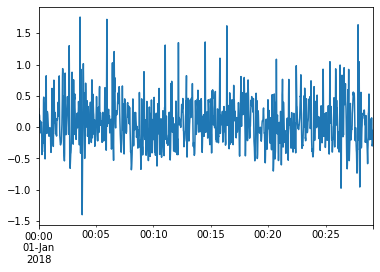

In [55]:
sensor['userAcceleration.x'].plot()

In [50]:
seasonal_useracc = seasonal_decompose(sensor['userAcceleration.x'], model="additive", period=60)

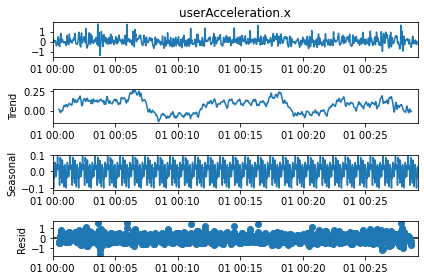

In [53]:
seasonal_useracc.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

In [54]:
seasonal_rotationr = seasonal_decompose(sensor['rotationRate.x'], model="additive", period=60)

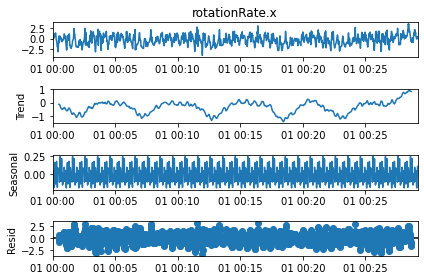

In [56]:
seasonal_rotationr.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

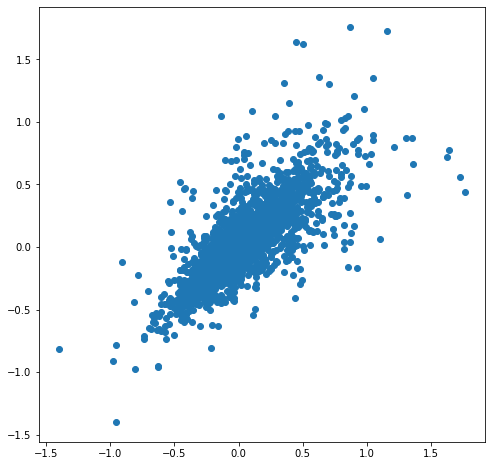

In [75]:
userAcc = sensor['userAcceleration.x'][:-1]
userAcc_plus1 = sensor['userAcceleration.x'][1:]
plt.figure(figsize=(8,8))
plt.scatter(userAcc.values, userAcc_plus1);

Create a lag plot for `rotationRate.x`

In [70]:
np.corrcoef(userAcc, userAcc_plus1)

array([[1.        , 0.75970362],
       [0.75970362, 1.        ]])

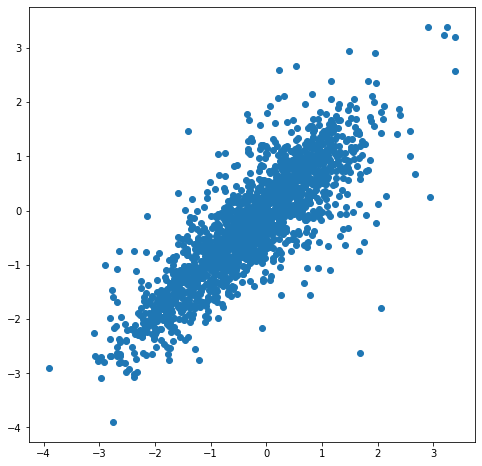

In [69]:
rotRate = sensor['rotationRate.x'][:-1]
rotRate_plus1 = sensor['rotationRate.x'][1:]
plt.figure(figsize=(8,8))
plt.scatter(rotRate.values, rotRate_plus1);

What are your conclusions from both visualizations?

In [71]:
np.corrcoef(rotRate, rotRate_plus1)

array([[1.        , 0.84709047],
       [0.84709047, 1.        ]])

In [11]:
"""
From both visualizations you can see that in the two variables there's high autocorrelation for the series,
lagged by 1 value

"""

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [18]:
from statsmodels.tsa.stattools import adfuller

In [21]:
userAcc_df = adfuller(sensor['userAcceleration.x'])
userAcc_df
p_value1 = userAcc_df[1]

In [78]:
rotRate_df = adfuller(sensor['rotationRate.x'])
rotRate_df

(-5.269860625086407,
 6.320230335912605e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 2619.6049719981957)

What are your conclusions from this test?

In [13]:
"""
As the p-value for both of the tests is lower than 0.05, and assuming that our alpha is 0.05, 
we can reject the null hypothesis assuming that both variables are stationary, it's main properties 
as mean and variance doesn't change with time. 

"""

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [80]:
from statsmodels.tsa.arima_model import ARIMA

In [83]:
model = ARIMA(sensor['userAcceleration.x'], order=(2,0,1))
model_fit = model.fit(disp=-1)
print(model_fit.summary())

/home/julian/miniconda3/envs/ironcon/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:     userAcceleration.x   No. Observations:                 1751
Model:                     ARMA(2, 1)   Log Likelihood                 379.399
Method:                       css-mle   S.D. of innovations              0.195
Date:                Thu, 16 Sep 2021   AIC                           -748.798
Time:                        17:10:31   BIC                           -721.458
Sample:                    01-01-2018   HQIC                          -738.692
                         - 01-01-2018                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0625      0.014      4.436      0.000       0.035       0.090
ar.L1.userAcceleration.x     0.9888      0.044     22.726      0.000       0.904       1.

In [84]:
model = ARIMA(sensor['rotationRate.x'], order=(2,0,1))
model_fit = model.fit(disp=-1)
print(model_fit.summary())

/home/julian/miniconda3/envs/ironcon/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:         rotationRate.x   No. Observations:                 1751
Model:                     ARMA(2, 1)   Log Likelihood               -1338.815
Method:                       css-mle   S.D. of innovations              0.520
Date:                Thu, 16 Sep 2021   AIC                           2687.630
Time:                        17:12:00   BIC                           2714.969
Sample:                    01-01-2018   HQIC                          2697.736
                         - 01-01-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.3123      0.072     -4.340      0.000      -0.453      -0.171
ar.L1.rotationRate.x     0.5644      0.039     14.466      0.000       0.488       0.641
ar.L2.rotati

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [16]:
# Your code here:

